# Arbitrary Value Imputation
1. its replace of replacing NAN by an arbitrary value

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
path = "C:/Users/DEVENDRA/Desktop/ml_database_7/titanic/train.csv"
df1 = pd.read_csv(path)

In [8]:
df = df1[['Survived','Age', 'Fare']]

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
def impute_nan(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100) 

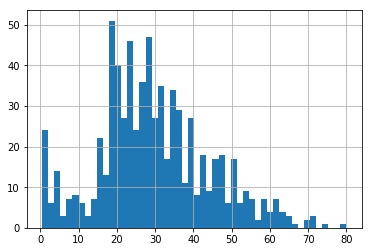

In [11]:
df['Age'].hist(bins=50)

In [12]:
## Arbitrary value
#### 1. its should not be more frequently

### Advantages
1. easy to implement
2. capture the importance of missingness if there any

### Disadvantages
1. Distorts the original distribution of the variable
2. hard to decided which value should use

# How to Handle Categorical Missing Values

## Frequenly Category Imputation

In [23]:
path = "C:/Users/DEVENDRA/Desktop/ml_database_7/house_price/train.csv"
df1 = pd.read_csv(path)

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [16]:
df1 = df1[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
df.shape

(891, 3)

In [20]:
### compute the frequency with every feature

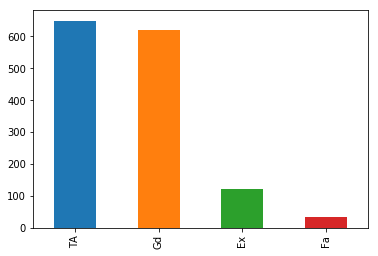

In [24]:
df1['BsmtQual'].value_counts().plot.bar()

In [45]:
# df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

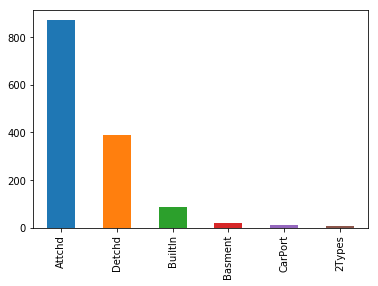

In [25]:
df1['GarageType'].value_counts().plot.bar()

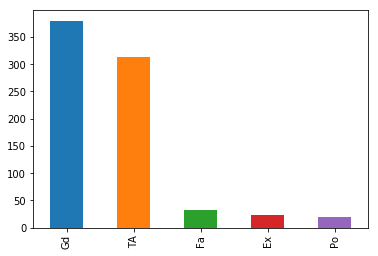

In [26]:
df1['FireplaceQu'].value_counts().plot.bar()

In [32]:
df = df1[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
def impute_nan(df, variable):
    most_freq_cate = df[variable].value_counts().index[0]
    df[variable].fillna(most_freq_cate, inplace = True)

In [35]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df, feature)

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [37]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages
1. easy to implement

#### Disadvantages
1. If there are many nan, it may over represented the value
2. its distorts the relation of the most frequent labels

# Adding the variable to capture the nan

In [38]:

# df = df[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [39]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,Gd,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [40]:
freq = df['BsmtQual'].mode()

In [41]:
df['BsmtQual'].fillna(freq, inplace = True)

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [42]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,Gd,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [79]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
freq = df['FireplaceQu'].mode()
df['FireplaceQu'].fillna(freq, inplace = True)

In [80]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,TA,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### suppose if we have more frequent categories, we just replace NAN with a new category

In [45]:
path = "C:/Users/DEVENDRA/Desktop/ml_database_7/house_price/train.csv"
df = pd.read_csv(path)

In [46]:
df = df[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [47]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
def impute_nan(df, variable):
    df[variable+'new_var'] = np.where(df[variable].isnull(), 'missing', df[variable])

In [51]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df, feature)

In [52]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [55]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'], axis = 1)